EDA

- Conduct EDA Before Feature Selection
  - Plot the distribution of each feature
- Identify Potential Biases or Imbalances in the Dataset

## load datasets

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

import os

import warnings
warnings.filterwarnings('ignore')

In [6]:
path = os.getcwd()
# get the data from the 1-data_cleaning folder for two csv files, us os.path.join

discrete_file_path = os.path.join(path, 'data', '1-data_cleaning', 'df_discrete_features.csv')
continuous_file_path = os.path.join(path, 'data', '1-data_cleaning', 'df_continuous_features.csv')

# read the csv files
df_discrete = pd.read_csv(discrete_file_path, index_col=0)
df_continuous = pd.read_csv(continuous_file_path, index_col=0)

In [7]:
df_discrete.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,grade,sub_grade,emp_length,home_ownership,verification_status,...,collection_recovery_fee,last_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,tot_coll_amt,total_rev_hi_lim,target
0,5000,5000,4975.0,36 months,10.65,B,B2,10+ years,RENT,Verified,...,0.00,Jan-15,Jan-16,0.0,1,INDIVIDUAL,0.0,NaN,NaN,0
1,2500,2500,2500.0,60 months,15.27,C,C4,< 1 year,RENT,Source Verified,...,1.11,Apr-13,Sep-13,0.0,1,INDIVIDUAL,0.0,NaN,NaN,1
2,2400,2400,2400.0,36 months,15.96,C,C5,10+ years,RENT,Not Verified,...,0.00,Jun-14,Jan-16,0.0,1,INDIVIDUAL,0.0,NaN,NaN,0
3,10000,10000,10000.0,36 months,13.49,C,C1,10+ years,RENT,Source Verified,...,0.00,Jan-15,Jan-15,0.0,1,INDIVIDUAL,0.0,NaN,NaN,0
4,3000,3000,3000.0,60 months,12.69,B,B5,1 year,RENT,Source Verified,...,0.00,Jan-16,Jan-16,0.0,1,INDIVIDUAL,0.0,NaN,NaN,0


In [8]:
df_continuous.head()

,installment,annual_inc,revol_bal,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,last_pymnt_amnt,tot_cur_bal,target
0,162.87,24000.0,13648,0.0,0.0,5861.071414,5831.78,5000.00,861.07,171.62,NaN,0
1,59.83,30000.0,1687,0.0,0.0,1008.710000,1008.71,456.46,435.17,119.66,NaN,1
2,84.33,12252.0,2956,0.0,0.0,3003.653644,3003.65,2400.00,603.65,649.91,NaN,0
3,339.31,49200.0,5598,0.0,0.0,12226.302210,12226.30,10000.00,2209.33,357.48,NaN,0
4,67.79,80000.0,27783,766.9,766.9,3242.170000,3242.17,2233.10,1009.07,67.79,NaN,0


# 1. Plot the distribution of both Discrete and Continuous features

In [9]:
discrete_features = df_discrete.columns[:-1]
continuous_features = df_continuous.columns[:-1]

## 1.1 Discrete features plot

discrete features:  Index(['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate',
       'grade', 'sub_grade', 'emp_length', 'home_ownership',
       'verification_status', 'pymnt_plan', 'purpose', 'addr_state', 'dti',
       'delinq_2yrs', 'earliest_cr_line', 'inq_last_6mths', 'open_acc',
       'pub_rec', 'revol_util', 'total_acc', 'initial_list_status',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_d', 'last_credit_pull_d', 'collections_12_mths_ex_med',
       'policy_code', 'application_type', 'acc_now_delinq', 'tot_coll_amt',
       'total_rev_hi_lim'],
      dtype='object')


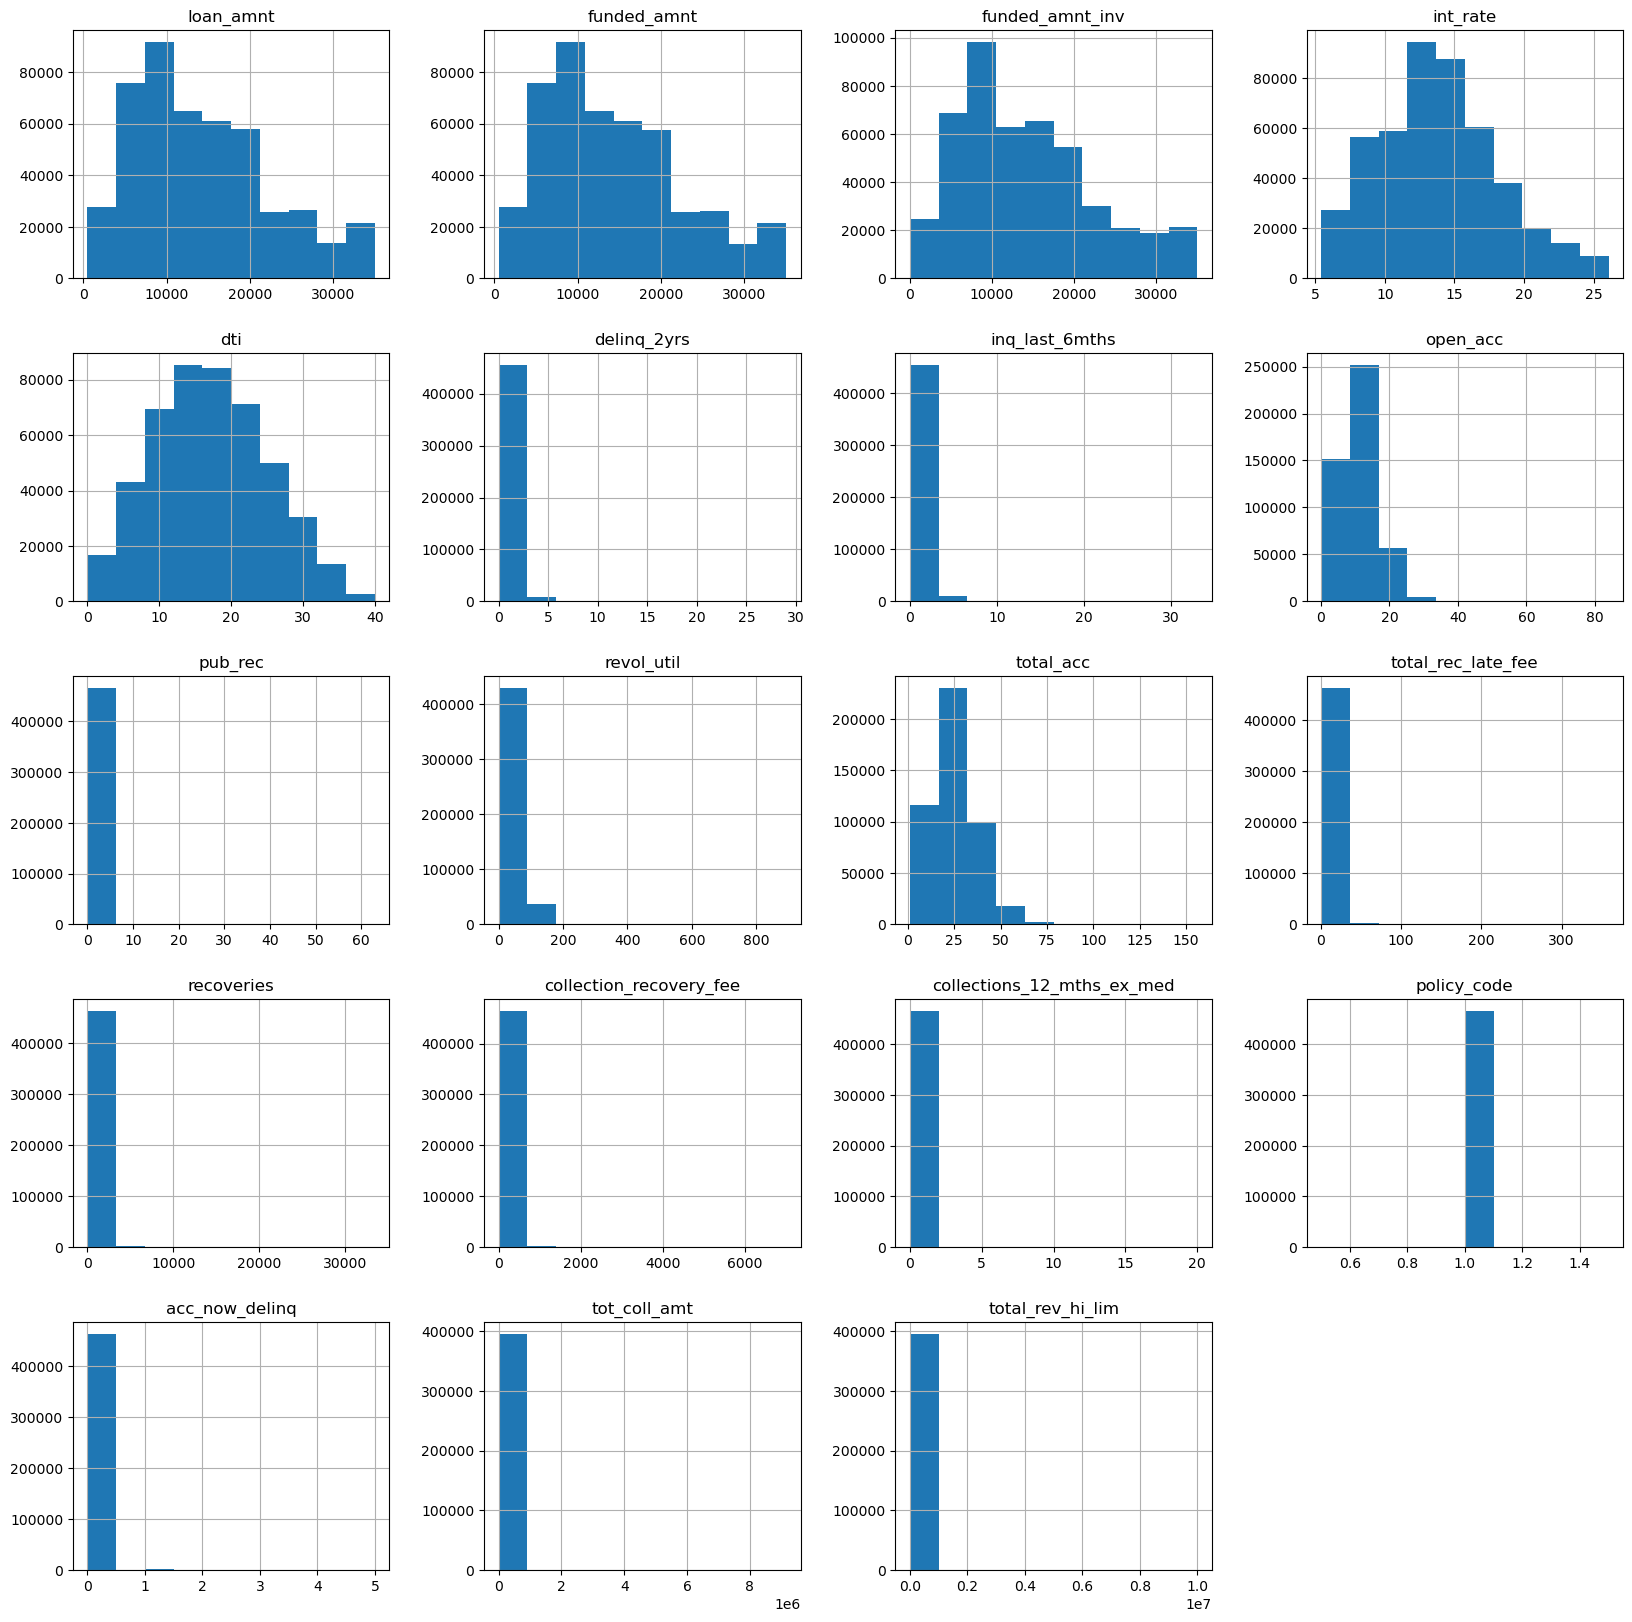

In [10]:
print("discrete features: ", discrete_features)
# plt the discrete features histogram
df_discrete[df_discrete.columns[:-1]].hist(figsize=(20, 20))
plt.show()

For categorical features, the histograms of certain attributes such as `loan_amnt`, `funded_amnt`, `funded_amnt_inv`, `int_rate`, `dti`, and `revol_util` are particularly worth analyzing due to their distinct distribution patterns. These features exhibit clear distribution shapes, which sets them apart from other variables that tend to cluster within a narrow range, with minimal values outside this range. 

When addressing outliers, a nuanced approach is advised. Rather than automatically classifying sparse data points as outliers, it's important to consider the context and the potential information they may hold. In some cases, transformations or more robust statistical methods might be more appropriate for handling these data points.

## 1.2 Continuous features plot

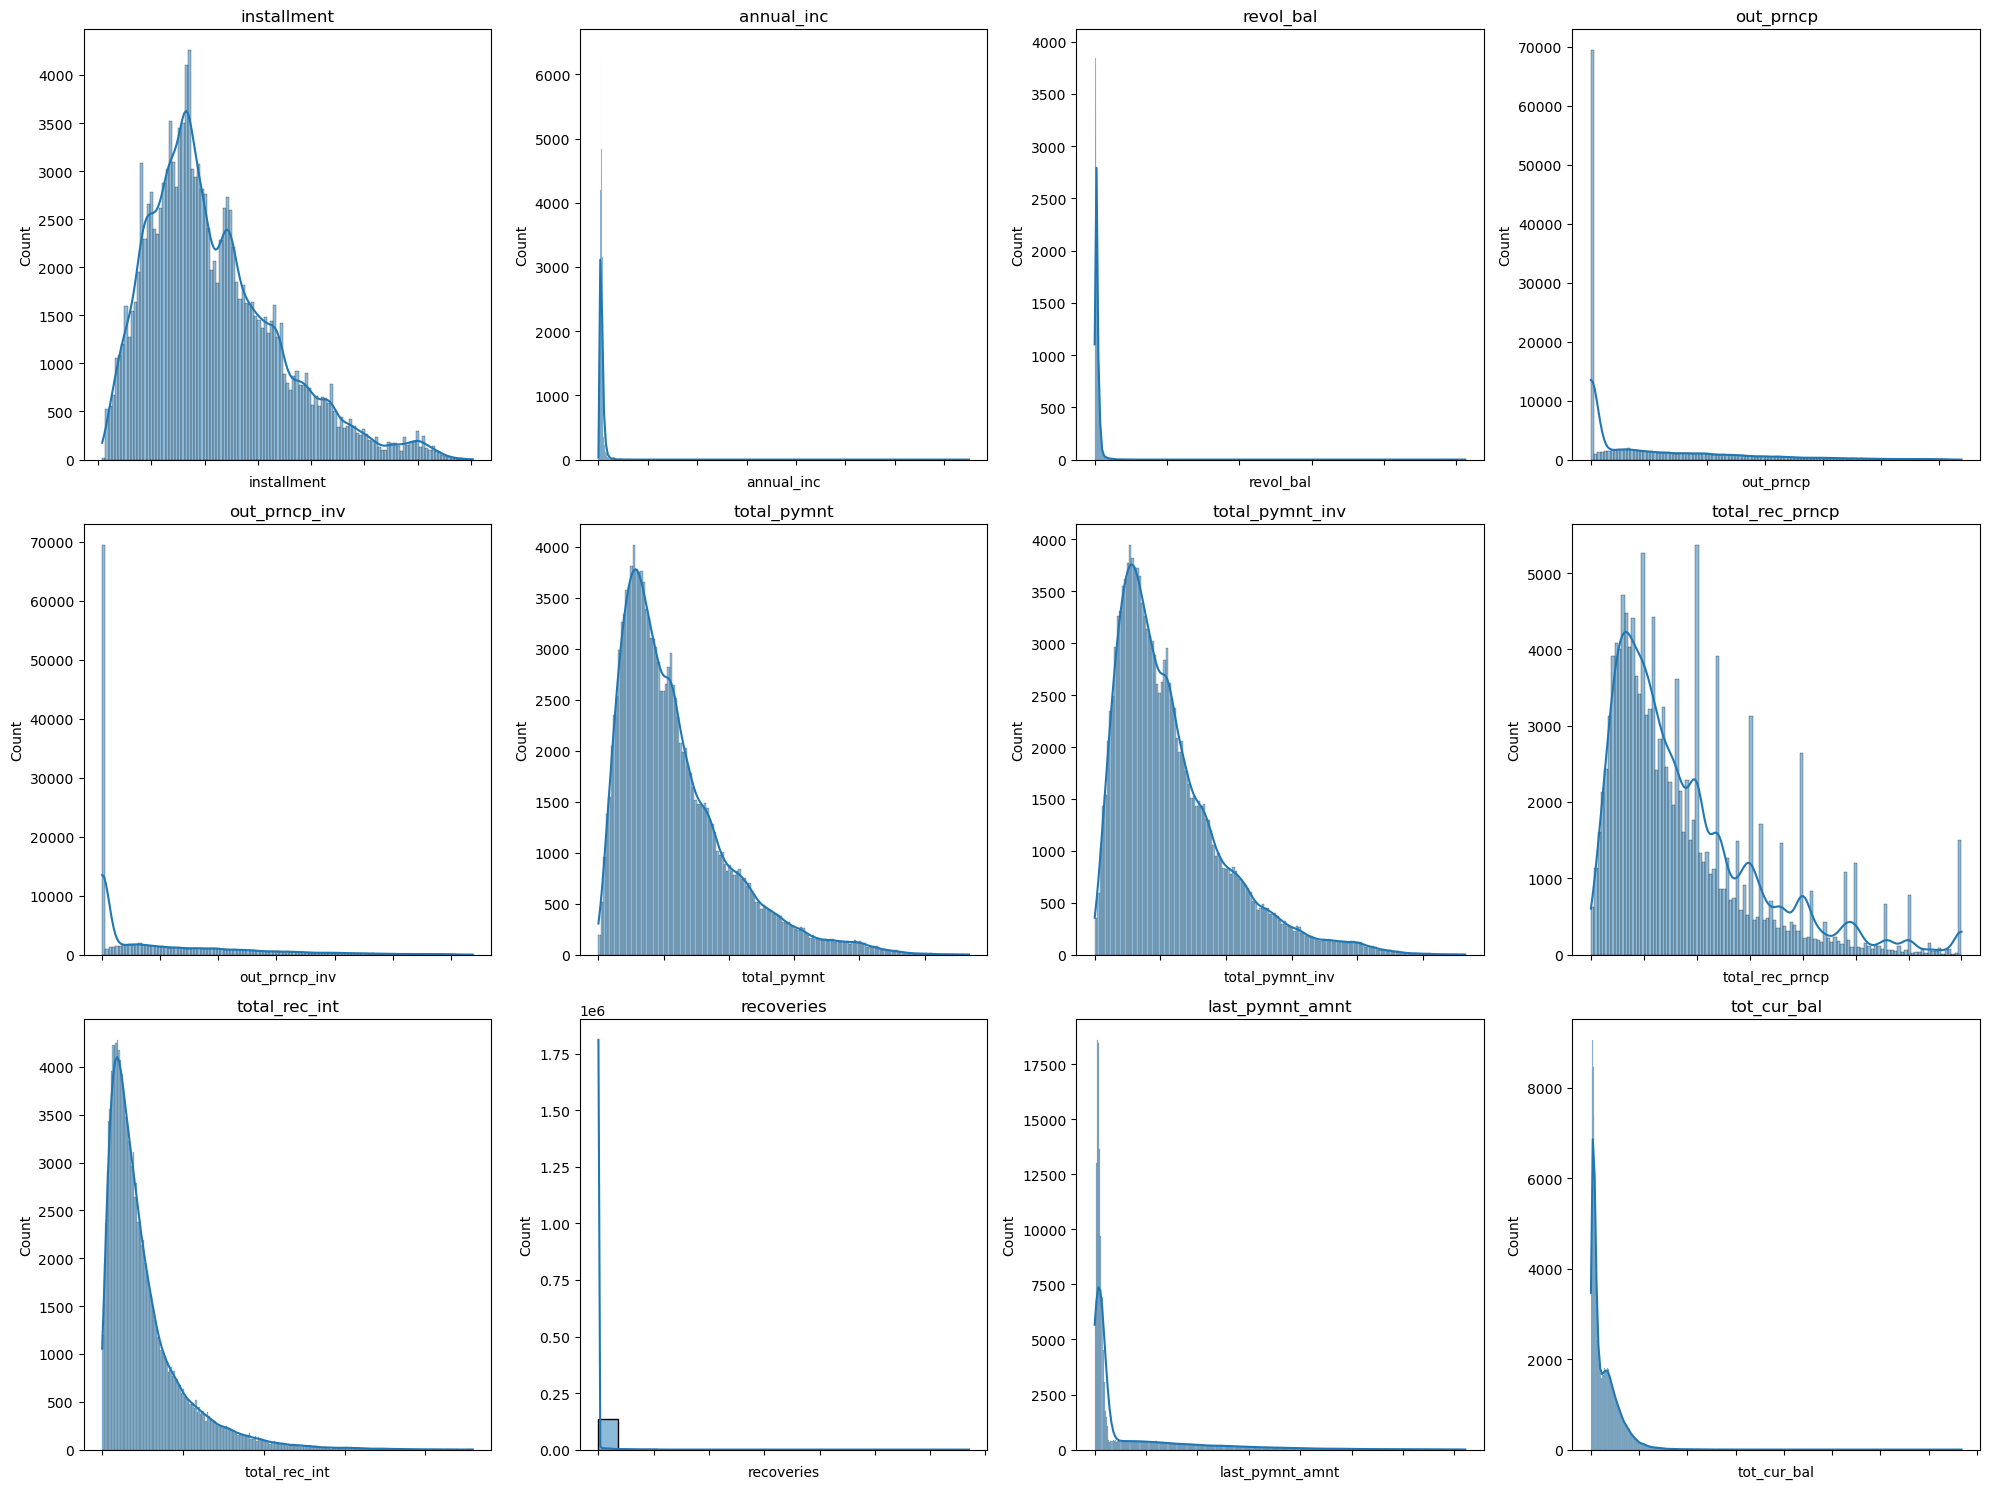

In [8]:
fig, axes = plt.subplots(3, 4, figsize=(20, 15))  # Adjust the grid size for 12 continuous features
for i, feature in enumerate(continuous_features):
    ax = axes[i // 4, i % 4]  # Adjust the indices for a 3x4 grid
    sns.histplot(df_continuous[feature],kde =True ,ax=ax)
    ax.set_title(feature)
    ax.set_xticklabels([])  # Hide x-axis labels

plt.tight_layout()
plt.show()

For continuous features such as `instalment`, `total_pymnt`, `total_pymnt_inv`, `total_rec_prncp`, and `total_rec_int`, there is a noticeable distribution pattern, albeit with a left-skewed distribution. The distribution of the remaining features tends to be more concentrated within a narrower range compared to the aforementioned features.

Expanding on this:

This observed skewness in key financial attributes like installment payments and total payments suggests that a significant portion of the borrowers tend to have lower payment amounts, with fewer instances of higher payments. This skewness could be indicative of the underlying financial behavior of the borrowers or the loan structure within the dataset. Addressing the skewness, particularly for modeling purposes, might involve applying transformations such as log or square root to these features to normalize their distribution, enhancing the performance of certain algorithms that assume normality.

Moreover, the concentration of other features within a smaller range may imply limited variability for those attributes across the dataset. This could either reflect a genuine lack of diversity in those financial characteristics or potentially highlight data collection biases or constraints. It's crucial to investigate whether this concentration impacts the model's ability to differentiate between various outcomes or if it suggests a need for feature engineering to better capture the underlying patterns.

Incorporating domain knowledge is essential to understand whether the observed distributions and concentrations align with expected financial behaviors or if they warrant further scrutiny. Additionally, exploring correlations between these continuous features and the target variable can shed light on their predictive power and relevance. Features with more varied distributions might offer more information gain and should be carefully assessed for inclusion in predictive models.

By thoroughly analyzing the distribution and concentration of these continuous features, we can better prepare the data for modeling, ensuring that the features included in the analysis provide meaningful insights and contribute to the robustness of the predictive models.

# 2 Normality test for Continuous features 

During the EDA (Exploratory Data Analysis) phase, in addition to visualizing the features, another critical aspect is performing statistical analyses on the distribution of the features. For continuous data, this step involves determining whether the data follows a Gaussian (normal) distribution or a non-Gaussian distribution. If the data is found to adhere to a Gaussian distribution, z-score normalization can be considered to standardize the data. Conversely, for non-Gaussian distributed data, min-max scaling could be a more suitable standardization technique. Below, I have employed the Shapiro-Wilk test to assess whether the continuous data conforms to a normal distribution, using a threshold of 0.05.

This approach underscores the importance of understanding the underlying distribution of continuous features, as the choice of normalization technique can significantly impact the performance of many statistical models and machine learning algorithms. The Shapiro-Wilk test, with a specified threshold, helps in making an informed decision on whether to apply z-score or min-max scaling, thereby ensuring the data is appropriately prepared for further analysis and modeling.

*The Shapiro-Wilk test evaluates a data sample and quantifies how likely it is that the data was drawn from a Gaussian distribution*

In [9]:
# Function to test if a distribution is Gaussian using Shapiro-Wilk test
def is_gaussian(series, alpha=0.05):
    stat, p = stats.shapiro(series)
    return p > alpha  # If p > alpha, the distribution is likely Gaussian

In [10]:
# Checking the distribution of each numerical feature
gaussian_columns = []
nongaussian_columns = []

for feature in continuous_features:
    if is_gaussian(df_continuous[feature]):
        gaussian_columns.append(feature)
    else:
        nongaussian_columns.append(feature)

In [30]:
print("Gaussian columns: ", gaussian_columns)

Gaussian columns:  ['annual_inc', 'tot_cur_bal']


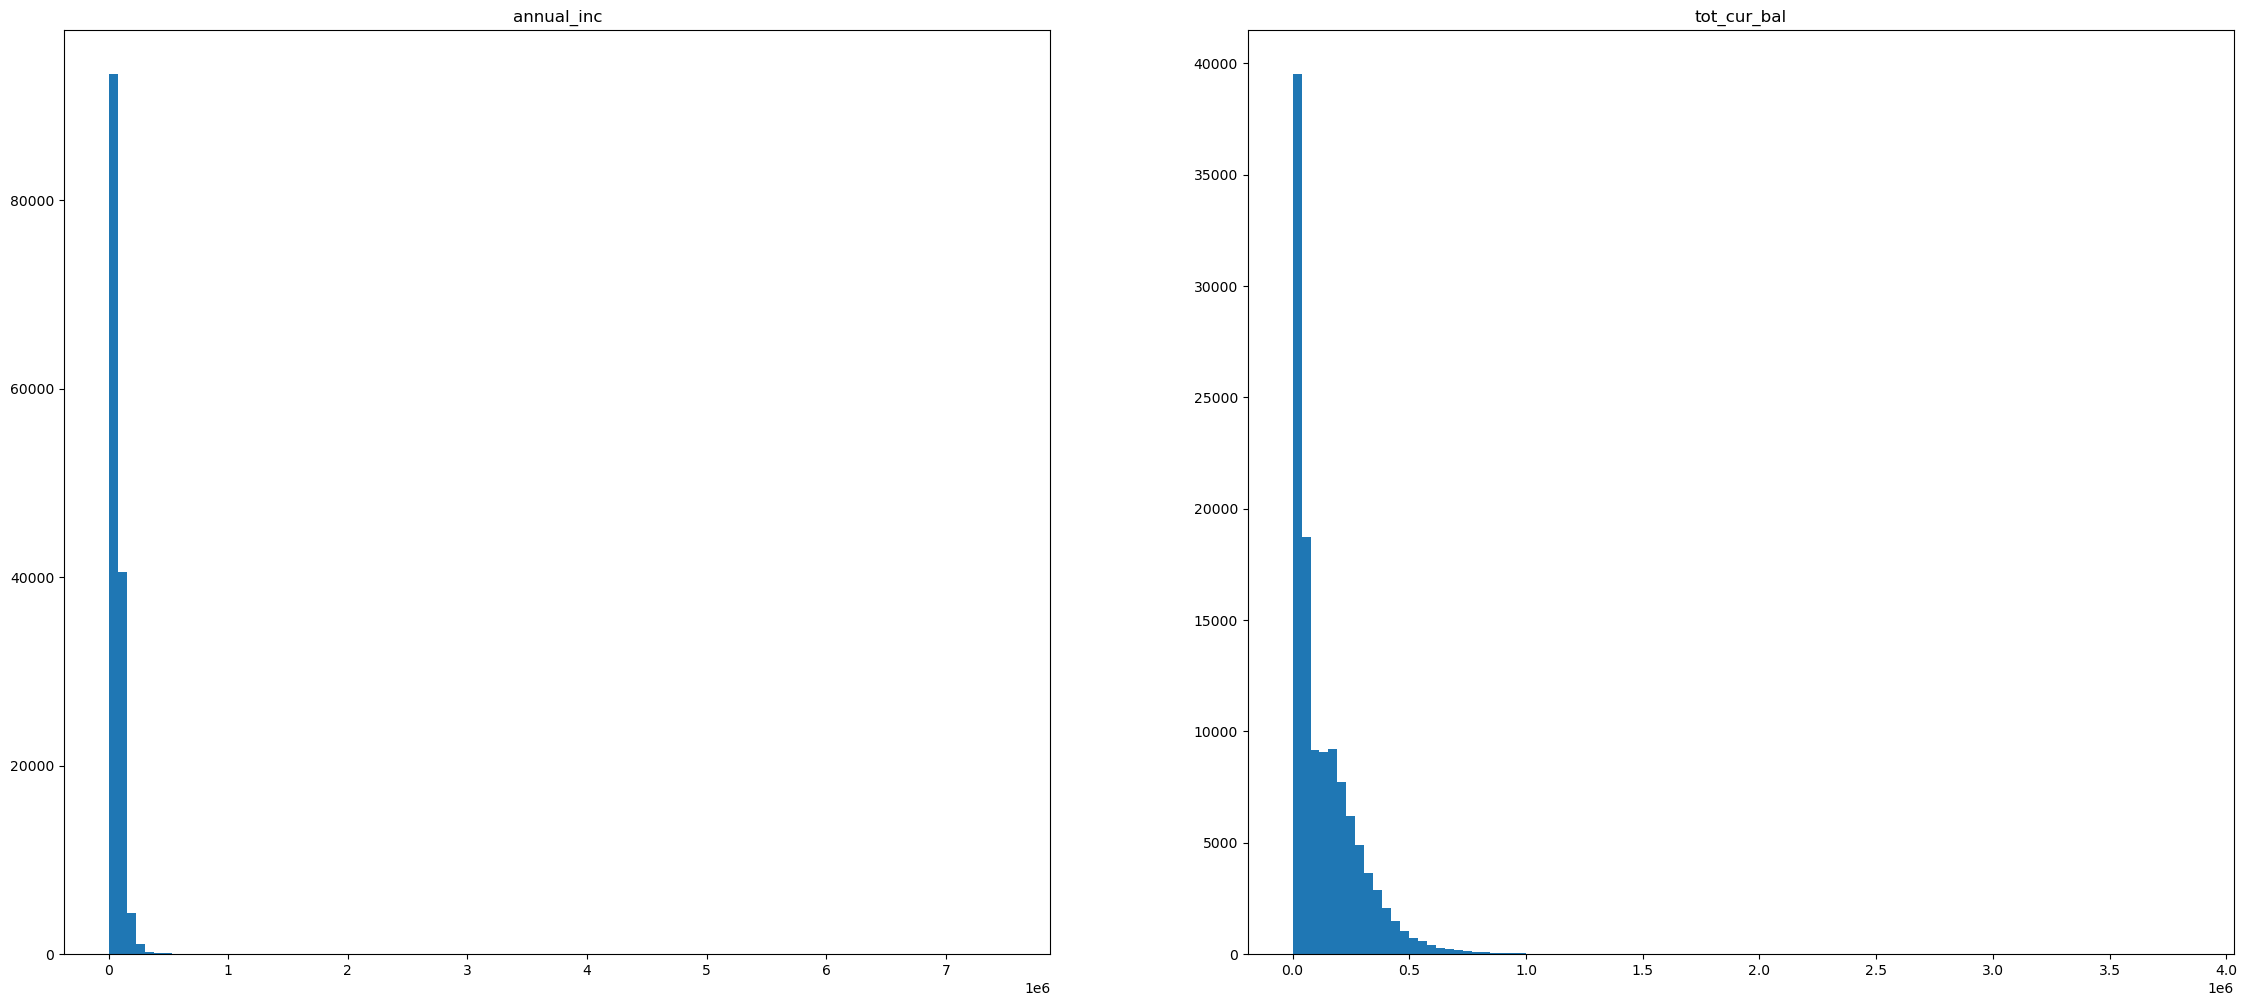

In [16]:
# plot all the gaussian features
fig, axes = plt.subplots(1,2 , figsize=(28, 12))  # Adjust the grid size for 12 continuous features
# plot ['annual_inc', 'tot_cur_bal']
# sns.histplot(df_continuous['tot_cur_bal'], kde=True)
axes[0].hist(df_continuous['annual_inc'], bins=100)
axes[0].set_title('annual_inc')
axes[1].hist(df_continuous['tot_cur_bal'], bins=100)
axes[1].set_title('tot_cur_bal')
plt.show()

In [20]:
df_continuous_copy = df_continuous.copy()

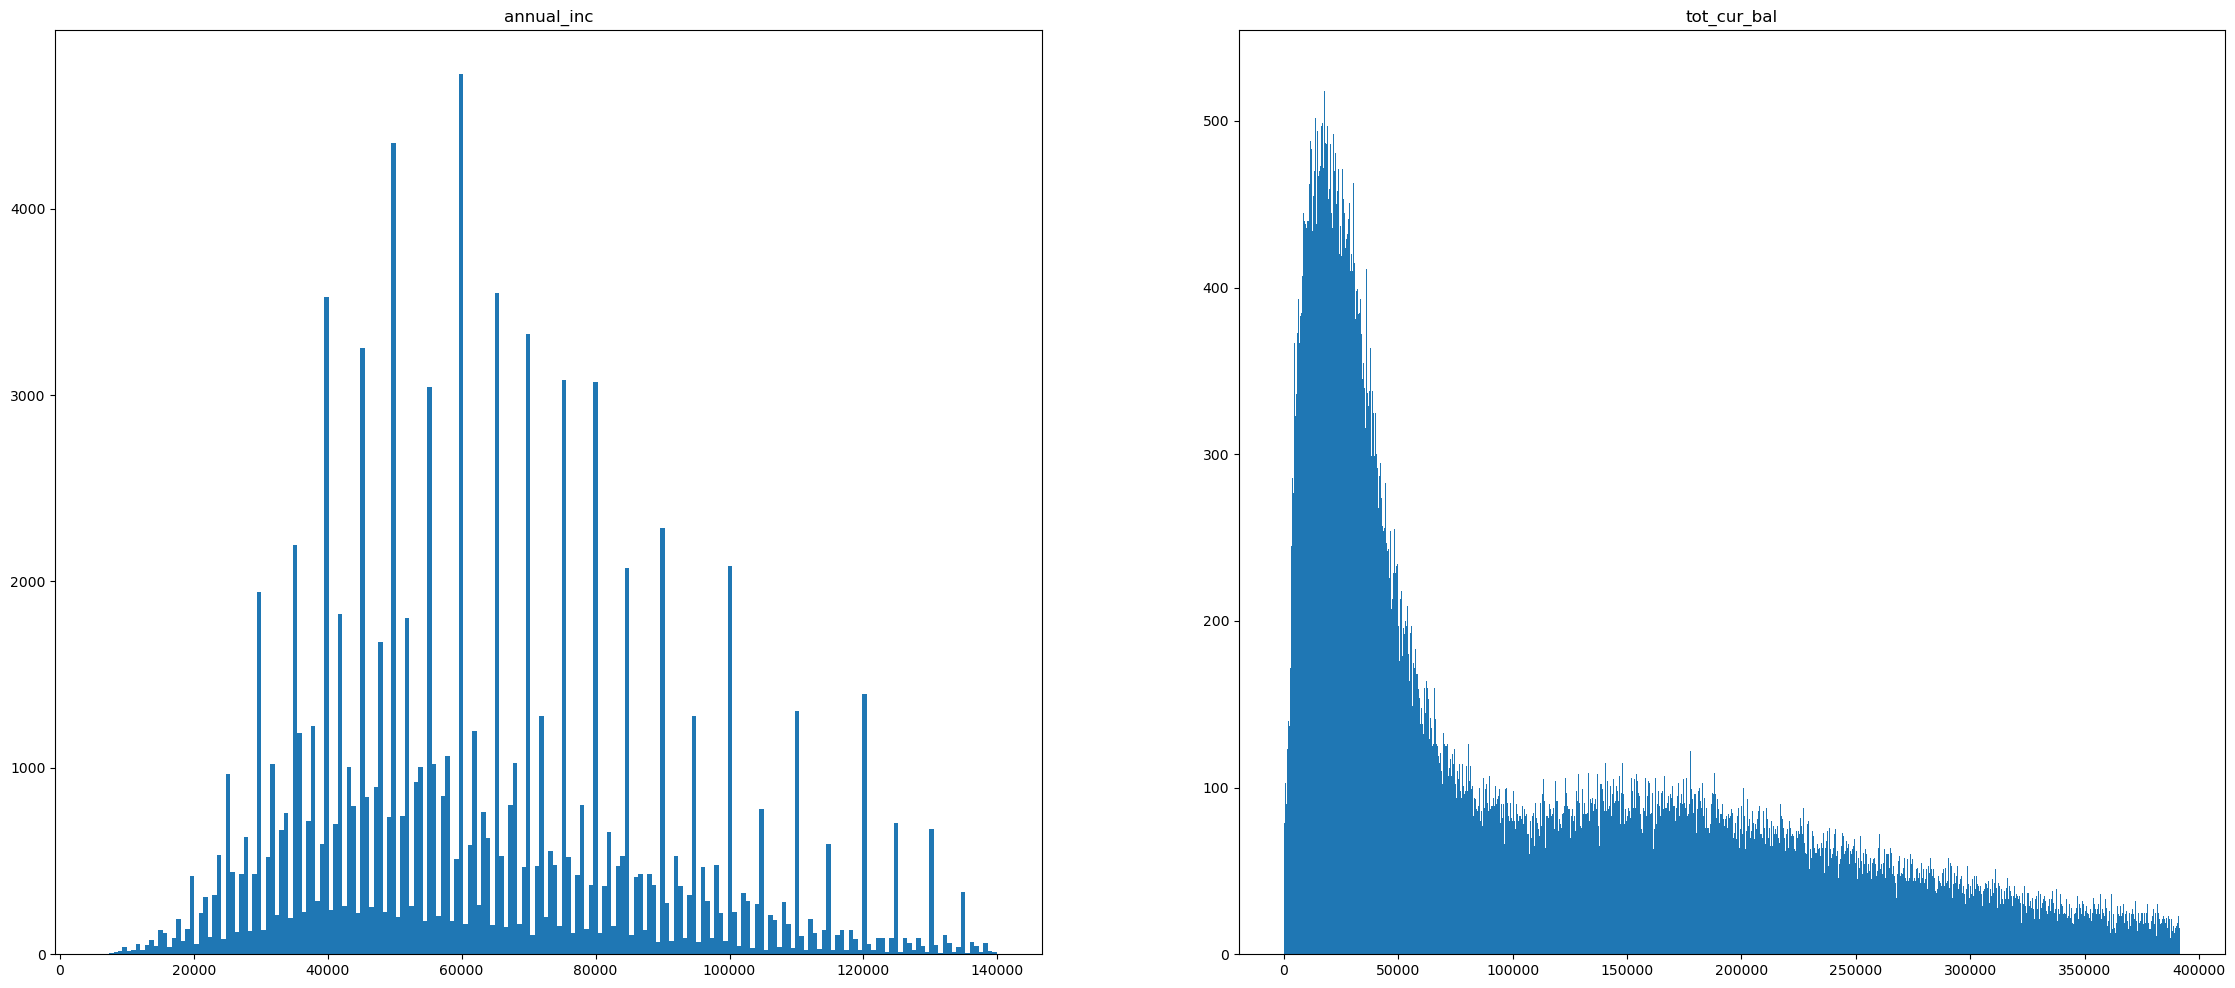

In [25]:
# apperently, these two feature contains outliers, we can use boxplot to check
# here I would like to use 99% quantile to remove the outliers
# remove the data which is larger than 99% quantile

df_continuous_copy = df_continuous_copy[df_continuous_copy['annual_inc'] < df_continuous_copy['annual_inc'].quantile(0.99)]
df_continuous_copy = df_continuous_copy[df_continuous_copy['tot_cur_bal'] < df_continuous_copy['tot_cur_bal'].quantile(0.99)]

# lets plot them again
fig, axes = plt.subplots(1,2 , figsize=(28, 12))  # Adjust the grid size for 12 continuous features
axes[0].hist(df_continuous_copy['annual_inc'], bins=200)
axes[0].set_title('annual_inc')
axes[1].hist(df_continuous_copy['tot_cur_bal'], bins=1000)
axes[1].set_title('tot_cur_bal')
plt.show()

Through the Shapiro-Wilk test, I identified two features, `annual_inc` and `tot_cur_bal`, that may partially conform to a normal distribution. However, after truncating the data at the 0.99 quantile to eliminate excessively large values (which I consider to be in the range of outliers), the distributions of these two features diverged significantly. `Annual_inc` aligned more closely with a normal distribution, whereas `tot_cur_bal` exhibited a tendency towards a left-skewed distribution. In the subsequent stages of data processing and feature selection, I plan to apply different transformation methods tailored to these distinct distribution characteristics to further refine the data.

Expanding on this approach, the differentiation in handling these features underscores the importance of a nuanced data preprocessing strategy. For `annual_inc`, given its closer adherence to a normal distribution, transformations such as z-score normalization could be more appropriate, as they are well-suited for data that is already Gaussian or nearly Gaussian. This would help in standardizing the feature, making it more amenable to algorithms that assume normality in the input data.

On the other hand, for `tot_cur_bal` with its left-skewed distribution, a transformation aimed at reducing skewness, such as a log transformation or a square root transformation, might be more beneficial. These transformations can help in making the distribution more symmetric, thereby improving the feature's compatibility with various statistical models and machine learning algorithms.

Moreover, the decision to truncate the data at the 0.99 quantile and treat extremely large values as outliers is a strategic choice that helps in focusing the analysis on a more representative range of the data. This approach not only mitigates the influence of extreme values but also facilitates a more accurate assessment of the underlying distribution patterns.

In summary, the tailored treatment of `annual_inc` and `tot_cur_bal` based on their distinct distributions after outlier removal highlights the critical role of adaptive preprocessing in enhancing model performance and reliability. This strategy ensures that each feature is optimally prepared for the feature selection phase, thereby laying a solid foundation for building robust predictive models.